# Image Preprocessing (Enhancement)

Link Hasil Image Enhancement:
https://drive.google.com/drive/folders/17zJwuvdMiM3HhnXpQH2Hk5BcYE9n7m0x?usp=sharing

In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

def load_images(folder):
  images=[]
  for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images

folder="/content/drive/MyDrive/Plat Nomor "
image_folder=load_images(folder)

In [ ]:
#memisahkan 3 channel RGB menjadi masing-masing channel
def processing(img):
  blue, green, red = cv2.split(img)
  dim_row, dim_col, dim_channel = img.shape

  zero_matrix = np.zeros((dim_row, dim_col), dtype="uint8")
  B = cv2.merge([blue, zero_matrix, zero_matrix])
  G = cv2.merge([zero_matrix, green, zero_matrix])
  R = cv2.merge([zero_matrix, zero_matrix, red])
  return B,G,R,dim_row,dim_col

In [ ]:
#Enhancement : Contrast Stretching
def contrast_stretch(image):
  image_temp=np.reshape(image,(1,-1))
  min_val=min(image_temp[0])
  max_val=max(image_temp[0])
  a=0; b=255; index=0
  for i in image_temp[0]:
    image_temp[0][index]=(i-min_val)*((b-a)/(max_val-min_val))+a
    index+=1
  new_image=np.reshape(image_temp,(dim_row,dim_col))
  return new_image

def defining_cs(B,G,R,dim_row,dim_col):
  img_blue=contrast_stretch(B[:,:,0])
  img_green=contrast_stretch(G[:,:,1])
  img_red=contrast_stretch(R[:,:,2])
  img_merge=cv2.merge([img_blue,img_green,img_red])
  return img_merge

In [ ]:
index=0
for filename in os.listdir(folder):
  img=image_folder[index]
  B,G,R,dim_row,dim_col=processing(img)
  final_image=defining_cs(B,G,R,dim_row,dim_col)
  string='/content/drive/MyDrive/Hasil/final_CS/'+filename
  cv2.imwrite(string, final_image)
  index+=1

In [ ]:
#Enhancement : Histogram Equalization
import math
def histo_equalization(img):
  pixel_intensity=[]
  for dim_row in range(img.shape[0]):
    for dim_col in range(img.shape[1]):
      pixel_intensity.append(img[dim_row][dim_col])
  
  intensity_freq=[0 for i in range(256)]
  for i in range(len(pixel_intensity)):
    intensity_freq[pixel_intensity[i]] += 1
  
  total_freq=sum(intensity_freq)
  pl=[]; cp=[]; cp_255=[]; final=[]

  for i in range(len(intensity_freq)):
    pl.append(intensity_freq[i]/total_freq)
    cp.append(sum(pl[0:i+1]))
    cp_255.append(cp[i]*255)
    final.append(math.floor(cp_255[i]))
  
  i=0
  for dim_row in range(img.shape[0]):
    for dim_col in range(img.shape[1]):
      img[dim_row][dim_col]=final[img[dim_row][dim_col]]
      i+=1

  return img

def defining_he(B,G,R,dim_row,dim_col):
  img_blue=histo_equalization(B[:,:,0])
  img_green=histo_equalization(G[:,:,1])
  img_red=histo_equalization(R[:,:,2])
  img_merge=cv2.merge([img_blue,img_green,img_red])
  return img_merge

In [ ]:
index=0
for filename in os.listdir(folder):
  img=image_folder[index]
  B,G,R,dim_row,dim_col=processing(img)
  final_image=defining_he(B,G,R,dim_row,dim_col)
  string='/content/drive/MyDrive/Hasil/final_HE/'+filename
  cv2.imwrite(string, final_image)
  index+=1

In [ ]:
#Enhancement: Convolution
def convolve(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))

    xKernel = kernel.shape[0]
    yKernel = kernel.shape[1]
    xImg = image.shape[0]
    yImg = image.shape[1]

    xOut = int(((xImg - xKernel + 2 * padding) / strides) + 1)
    yOut = int(((yImg - yKernel + 2 * padding) / strides) + 1)
    output = np.zeros((xOut, yOut))

    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernel:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernel:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernel, y: y + yKernel]).sum()
                except:
                    break

    return output

#Memisahkan 3 channel RGB
def splitImg(img,mask):  
    b,g,r = cv2.split(img)
    img_b = convolve(b, mask, padding = 0)
    img_g = convolve(g, mask, padding = 0)
    img_r = convolve(r, mask, padding = 0)

    img_out = cv2.merge((img_b, img_g, img_r))
    return img_out

In [ ]:
#Sharpening Kernel
sharp1 = np.array([[-1,-1,-1],
                  [-1,9,-1],
                  [-1,-1,-1]])
sharp2 = np.array([[-1,-1,-1,-1,-1],
                [-1,-1,-1,-1,-1],
                [-1,-1,25,-1,-1],
                [-1,-1,-1,-1,-1],
                [-1,-1,-1,-1,-1]])
path = r'/content/drive/MyDrive/Hasil/Dataset/Plat Nomor'
path2 = r'/content/drive/MyDrive/Hasil/spatial kernel'
listing = os.listdir(path)
index = 0
for filename in listing:
  img = cv2.imread(path + '/' + filename)
  temp = splitImg(img,sharp1)
  cv2.imwrite(os.path.join(path2, filename) , temp)
  index+=1

In [ ]:
#Gaussian Sharpening Kernel
gaus = np.array([[1,4,6,4,1],
                [4,16,24,16,4],
                [6,24,-476,24,6],
                [4,16,24,16,4],
                [1,4,6,4,1]])
gaus = gaus*(-1/256)
path = r'/content/drive/MyDrive/Hasil/Dataset/Plat Nomor'
path2 = r'/content/drive/MyDrive/Hasil/final_gaus'
listing = os.listdir(path)
index = 0
for filename in listing:
  img = cv2.imread(path + '/' + filename)
  temp = splitImg(img,gaus)
  cv2.imwrite(os.path.join(path2, filename) , temp)
  index+=1

# Image Localization

Google Drive (Dataset) : https://drive.google.com/drive/folders/1vZKueVasC5ZQmb7uEGMkJzTEjnP3Hc0o?usp=sharing <br>
Original Notebook (Notebook telah dirun) : https://colab.research.google.com/drive/1CojKHURJnH2aRgivpYtV7lQBfWaiyuHP?usp=sharing <br>

## Load Data & Libraries

In [ ]:
from google.colab import drive
nama_folder = 'final_gaus'
drive.mount('/content/drive', force_remount=True)
image_path = "/content/drive/My Drive/Dataset/Plat Nomor/Hasil/"+nama_folder #Ubah sesuai google drive

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import glob



In [ ]:
IMAGE_SIZE = 224
image_list = []
image_list = glob.glob(image_path+"/*.png")
image_list.sort()
image_list[:5]

['/content/drive/My Drive/Dataset/Plat Nomor/Hasil/final_gaus/Cars0.png',
 '/content/drive/My Drive/Dataset/Plat Nomor/Hasil/final_gaus/Cars1.png',
 '/content/drive/My Drive/Dataset/Plat Nomor/Hasil/final_gaus/Cars102.png',
 '/content/drive/My Drive/Dataset/Plat Nomor/Hasil/final_gaus/Cars11.png',
 '/content/drive/My Drive/Dataset/Plat Nomor/Hasil/final_gaus/Cars111.png']

In [ ]:
X=[]
for image in tqdm(image_list):
    img = cv2.imread(image)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    X.append(np.array(img))
    

100%|██████████| 150/150 [01:06<00:00,  2.26it/s]


In [ ]:
xml_list = []
for i in range(len(image_list)):
  xml_list.append("annotations/Cars"+str(os.path.splitext(image_list[i])[0].split('Cars')[1])+".xml")

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
y=[]
for i in tqdm(xml_list):
    y.append(resizeannotation('/content/drive/My Drive/Dataset/Plat Nomor/'+i))

100%|██████████| 150/150 [00:46<00:00,  3.22it/s]


In [ ]:
y = np.asarray(y)
y.shape

(150, 4)

## Example Data

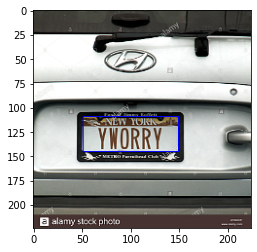

In [ ]:
import matplotlib.pyplot as plt

# Generate Data and rectangle anotations don't run unless necessary
for i in range(len(X)):
  image = cv2.rectangle(np.copy(X[i]),(y[i][0],y[i][1]),(y[i][2],y[i][3]),(0, 0, 255))
  plt.imshow(image)
  # plt.savefig('/content/drive/My Drive/Dataset/Plat Nomor/annotatedDataset/CarsAnnotate'+str(i)+'.png')
  

## Test Train Split

In [ ]:
# Normalize to Domain = [0, 1]
y = y/IMAGE_SIZE
X = X/255.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Create CNN Model

In [ ]:
from tensorflow.python.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.python.keras.applications.xception import Xception  
from tensorflow.keras import Model
import tensorflow as tf

In [ ]:
from tensorflow.python.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.python.keras.applications.xception import Xception  

inp = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model = Xception(include_top=False, input_tensor=inp, weights='imagenet')
y = base_model.layers[-1].output
y = GlobalAveragePooling2D() (y)
y = Dense(4, activation='sigmoid') (y)
model = Model(inputs=inp, outputs=y)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

### Training

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20)

Epoch 1/20
4/4 [==============================] - 69s 17s/step - loss: 0.0298 - val_loss: 0.0819
Epoch 2/20
4/4 [==============================] - 69s 17s/step - loss: 0.0114 - val_loss: 0.0913
Epoch 3/20
4/4 [==============================] - 68s 17s/step - loss: 0.0107 - val_loss: 0.0959
Epoch 4/20
4/4 [==============================] - 68s 17s/step - loss: 0.0094 - val_loss: 0.0814
Epoch 5/20
4/4 [==============================] - 68s 17s/step - loss: 0.0094 - val_loss: 0.0920
Epoch 6/20
4/4 [==============================] - 68s 17s/step - loss: 0.0049 - val_loss: 0.0793
Epoch 7/20
4/4 [==============================] - 68s 17s/step - loss: 0.0033 - val_loss: 0.0537
Epoch 8/20
4/4 [==============================] - 70s 18s/step - loss: 0.0031 - val_loss: 0.0487
Epoch 9/20
4/4 [==============================] - 69s 17s/step - loss: 0.0021 - val_loss: 0.0474
Epoch 10/20
4/4 [==============================] - 68s 17s/step - loss: 0.0017 - val_loss: 0.0443
Epoch 11/20
4/4 [============

## Hasil

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
cv2_imshow(X_test[0]*255)

In [ ]:
def seePredictions(X, y):
  y = np.array(y)
  image = cv2.rectangle(np.copy(X), (int(y[0]),int(y[1])), (int(y[2]),int(y[3])), (0, 0, 255))
  cv2_imshow(image*255)

In [ ]:
y_test_prediction = model.predict(X_test)
for i in range(10):
  print("Ground Truth")
  seePredictions(X_test[-i], y_test[-i]*IMAGE_SIZE)

  print("Prediction")
  seePredictions(X_test[-i], y_test_prediction[-i]*IMAGE_SIZE)


In [ ]:
y_train_prediction = model.predict(X_train)

for i in range(10):
  print("Ground Truth")
  seePredictions(X_train[i], y_train[i]*IMAGE_SIZE)

  print("Prediction")
  seePredictions(X_train[i], y_train_prediction[i]*IMAGE_SIZE)

## Export Results

In [ ]:
save_path = "/content/drive/My Drive/Dataset/Plat Nomor/Hasil Lokalisasi/final HE/train/"

for i in range(len(y_train_prediction)):
  cv2.imwrite(save_path+'localization'+str(i)+'.png', X_train[i][int(y_train_prediction[i][3]*IMAGE_SIZE):int(y_train_prediction[i][1]*IMAGE_SIZE), int(y_train_prediction[i][2]*IMAGE_SIZE):int(y_train_prediction[i][0]*IMAGE_SIZE)]*255)


In [ ]:
save_path = "/content/drive/My Drive/Dataset/Plat Nomor/Hasil Lokalisasi/final HE/test/"

for i in range(len(y_test_prediction)):
  cv2.imwrite(save_path+'localization'+str(i)+'.png', X_test[i][int(y_test_prediction[i][3]*IMAGE_SIZE):int(y_test_prediction[i][1]*IMAGE_SIZE), int(y_test_prediction[i][2]*IMAGE_SIZE):int(y_test_prediction[i][0]*IMAGE_SIZE)]*255)


## Plot Graphs

In [ ]:
## Plotting Graph

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [ ]:
size_histories = {}

In [ ]:
# Add version
size_histories['final HE'] = history

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=0)
plotter.plot(size_histories)
plt.ylim([0.0, 0.02])

# Image Segmentation

## Load localization results

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip "./drive/My Drive/lokalisasi.zip"

Archive:  ./drive/My Drive/lokalisasi.zip
  inflating: test/localization24.png  
  inflating: test/localization1.png  
  inflating: test/localization33.png  
  inflating: test/localization27.png  
  inflating: test/localization28.png  
  inflating: test/localization39.png  
  inflating: test/localization36.png  
  inflating: test/localization31.png  
  inflating: test/localization21.png  
  inflating: test/localization23.png  
  inflating: test/localization22.png  
  inflating: test/localization2.png  
  inflating: test/localization34.png  
  inflating: test/localization9.png  
  inflating: test/localization15.png  


In [ ]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from google.colab.patches import cv2_imshow

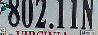

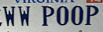

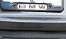

In [ ]:
mypath='test'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )
  cv2_imshow(images[n])
  print()

## Preprocess

Image diubah menjadi grayImage, diperbesar, kemudian diblur dengan median filter untuk menghilangkan noise.

In [ ]:
def Bluring(img):
  kernel = 1/9 * np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])
  return cv2.filter2D(img, -1, kernel)

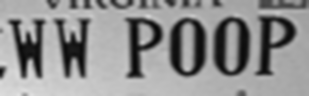

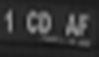

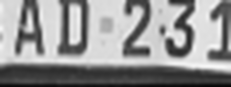

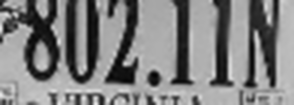

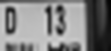

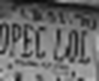

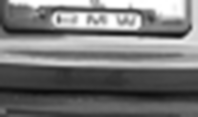

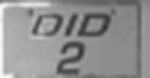

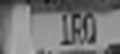

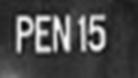

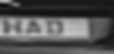

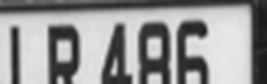

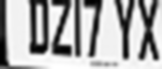

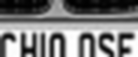

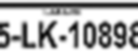

In [ ]:
import numpy as np
grayImages = []
blurredImages = []

for i in range(len(images)):
  images[i] = cv2.resize(images[i], None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
  grayImages.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY))
  grayImage = Bluring(grayImages[i])
  blurredImages.append(Bluring(grayImage))
  cv2_imshow(blurredImages[i])
  print()
  print()

## Images Histogram

In [ ]:
import matplotlib.pyplot as plt

grayPixelVal = []
grayHistogram = []

# height = grayImage.shape[0]
# length = grayImage.shape[1]

def printHistogram(img, pixel, histogram):
  pixel.clear()
  histogram.clear()

  for j in range(img.shape[1]):
    for i in range(img.shape[0]):
      pixel.append(img[i][j])

  plt.hist(pixel, bins = 256)
  plt.title('Image Histogram')
  plt.show()

  for i in range(256):
      histogram.append(0)
  for i in range(img.shape[1]*img.shape[0]):
      histogram[pixel[i]] += 1
  
  return histogram

Histogram Image 1


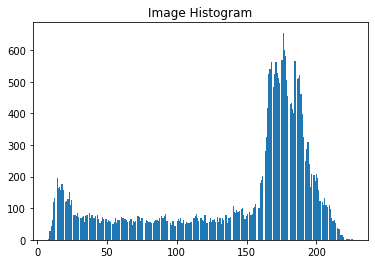

Histogram Image 2


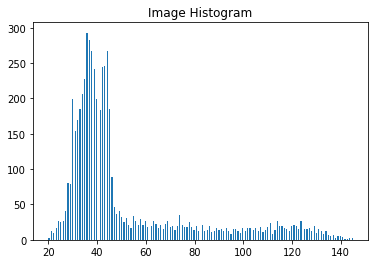

Histogram Image 3


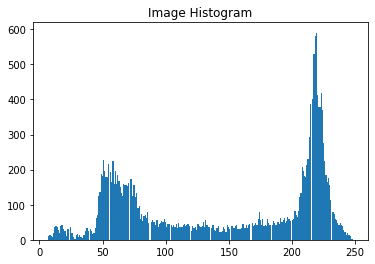

Histogram Image 4


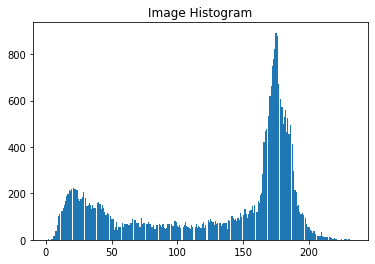

Histogram Image 5


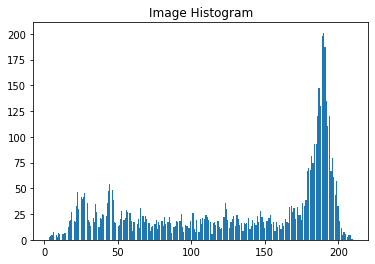

Histogram Image 6


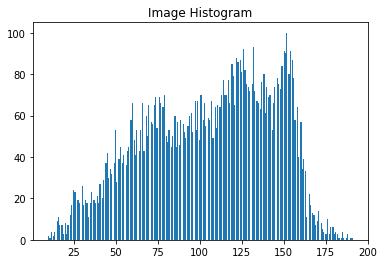

Histogram Image 7


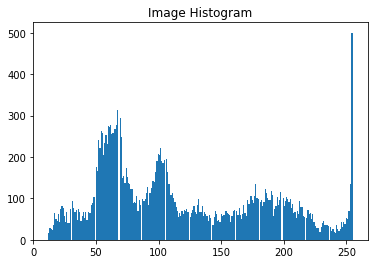

Histogram Image 8


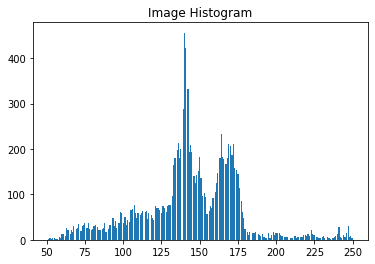

Histogram Image 9


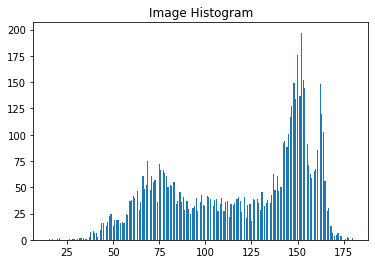

Histogram Image 10


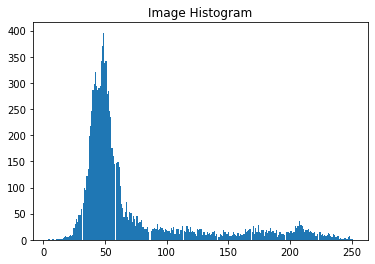

Histogram Image 11


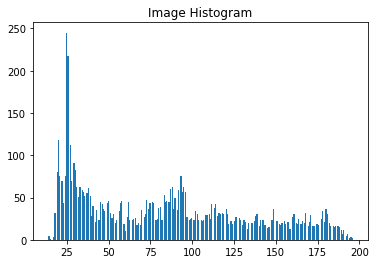

Histogram Image 12


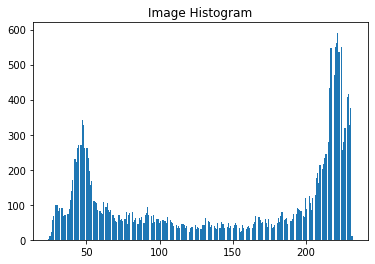

Histogram Image 13


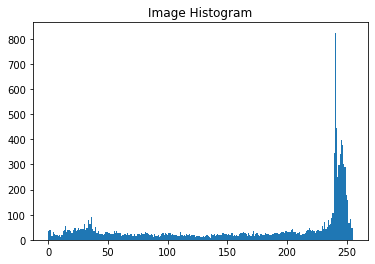

Histogram Image 14


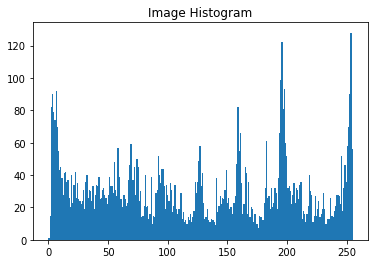

Histogram Image 15


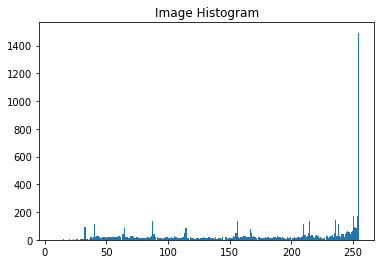

In [ ]:
hasil = []
for i in range(len(images)):
  histogram = []
  graylevel = []
  print("Histogram Image", i+1)
  hasil = printHistogram(blurredImages[i],graylevel,histogram)
  grayHistogram.append(hasil)

## Otsu Method

In [ ]:
def otsuCalculate(histogram,T, minVariance, threshold):
  background = histogram[:T]
  foreground = histogram[T:]
  pixelCount = sum(histogram)
  pixelBackground = sum(background)
  pixelForeground = sum(foreground)

  weightBackground = pixelBackground / pixelCount

  meanBackground = 0
  for i in range(len(background)):
    meanBackground += histogram[i]*i
  if pixelBackground != 0:
    meanBackground /= pixelBackground
  else :
    meanBackground = 0

  varianceBackground = 0
  for i in range(len(background)):
    varianceBackground += pow((i-meanBackground),2)*histogram[i]
  if pixelBackground != 0:
    varianceBackground /= pixelBackground
  else:
    varianceBackground = 0

  weightForeground = pixelForeground / pixelCount

  meanForeground = 0
  for i in range(len(foreground)):
    meanForeground += histogram[i+T]*(i+T)
  if pixelForeground != 0:
    meanForeground /= pixelForeground
  else :
    meanForeground = 0

  varianceForeground = 0
  for i in range(len(foreground)):
    varianceForeground += pow((i+T-meanForeground),2)*histogram[i+T]
  if pixelForeground != 0:
    varianceForeground /= pixelForeground
  else :
    varianceForeground = 0

  classVariance = weightBackground * varianceBackground + weightForeground * varianceForeground

  if minVariance > classVariance:
    minVariance = classVariance
    threshold = T
  
  if T < len(histogram)-1:
    T += 1
    return otsuCalculate(histogram,T,minVariance,threshold)
  else :
    return threshold

def otsu(histogram):
  return otsuCalculate(histogram,0,sys.maxsize * 1.0,0)

def Thresholding(img,Threshold):
  for j in range(img.shape[1]):
    for i in range(img.shape[0]):
      if img[i][j] <= Threshold:
        img[i][j] = 0
      elif img[i][j] > Threshold:
        img[i][j] = 255
  return img

## Results

Threshold =  115


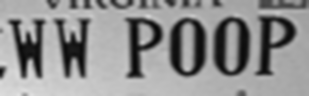

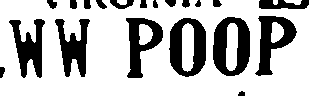


Threshold =  72


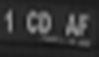

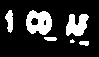


Threshold =  141


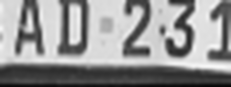

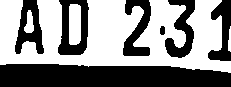


Threshold =  108


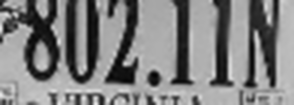

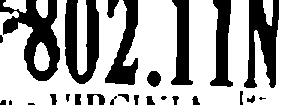


Threshold =  118


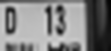

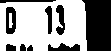


Threshold =  101


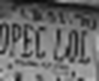

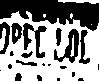


Threshold =  135


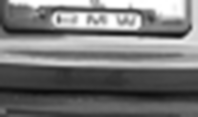

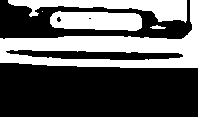


Threshold =  130


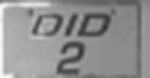

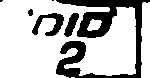


Threshold =  113


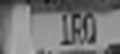

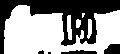


Threshold =  116


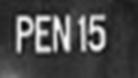

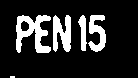


Threshold =  91


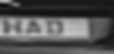

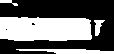


Threshold =  138


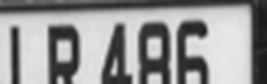

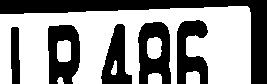


Threshold =  145


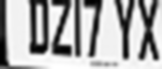

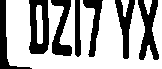


Threshold =  123


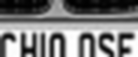

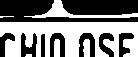


Threshold =  163


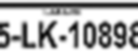

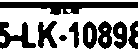

In [ ]:
import sys

segmentedImage = []

for i in range(len(images)):
  threshold = otsu(grayHistogram[i])
  print('Threshold = ', threshold)
  thresholdGray = blurredImages[i].copy()
  segmentedImage.append(Thresholding(thresholdGray, threshold))
  cv2_imshow(blurredImages[i])
  cv2_imshow(segmentedImage[i])
  print()

# OCR

## Setup and load libraries

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=ef1ca44bc79c77269a89313e972fb662c73cdd2fe6e483a6ea1e478dab7a2aca
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [ ]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from google.colab.patches import cv2_imshow
import pytesseract
import numpy as np

## OCR on original images

In [ ]:
!unrar x "/content/drive/MyDrive/plat (1).rar"

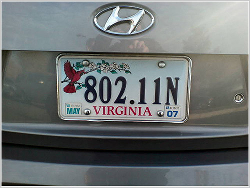

Hasil Recognition:  




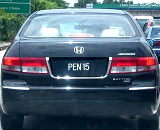

Hasil Recognition:  e = =





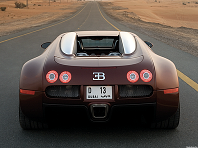

Hasil Recognition:  4 =





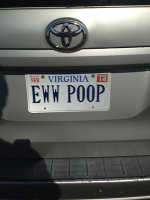

Hasil Recognition:  




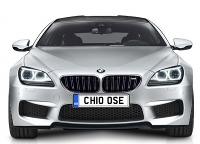

Hasil Recognition:  ero





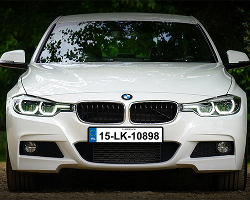

Hasil Recognition:  




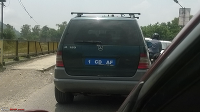

Hasil Recognition:  




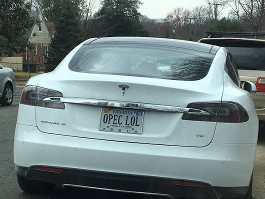

Hasil Recognition:  




In [ ]:
mypath='plat'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
ori = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  ori[n] = cv2.imread( join(mypath,onlyfiles[n]) )
  plat = pytesseract.image_to_string(ori[n], lang="eng", config='--psm 7')
  ori[n] = cv2.resize(ori[n], None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
  cv2_imshow(ori[n])
  print("Hasil Recognition: ", plat)
  print()
  print()

## OCR on Processed Image

Melakukan recognition karakter pada plat untuk images hasil processing, yaitu image yang telah dikenakan enhancement, localization, dan segmentation tadi.

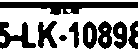

Hasil Recognition:  5-1 K-1089%





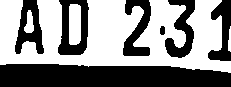

Hasil Recognition:  AU 29]





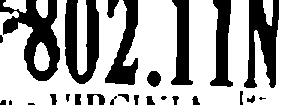

Hasil Recognition:  “OUZ.LIN





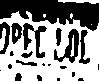

Hasil Recognition:  a





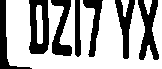

Hasil Recognition:  DLT YK





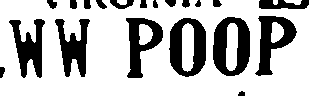

Hasil Recognition:  WW POOP





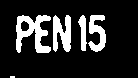

Hasil Recognition:  PEN i)





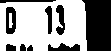

Hasil Recognition:  one





In [ ]:
index = [0, 2, 3, 4, 6, 7, 12, 13]
segmentedImages = []

for i in index:
  segmentedImages.append(segmentedImage[i])

for img in segmentedImages:
  text = pytesseract.image_to_string(img, config='--psm 7')
  cv2_imshow(img)
  print("Hasil Recognition: ", text)
  print()
  print()

## Further Processing

Akan coba dilihat apakah dengan pemrosesan lebih lanjut, ocr dapat dilakukan dengan lebih baik lagi.

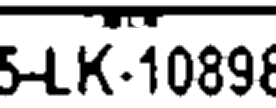

In [ ]:
#image 8
new8 = segmentedImages[0]
new8 = cv2.resize(new8, None, fx=2, fy=2, interpolation = cv2.INTER_AREA)
new8 = Bluring(new8)
kernel = np.ones((4, 4), np.uint8)
new8 = cv2.dilate(new8, kernel, iterations=1)
cv2_imshow(new8)

In [ ]:
print(pytesseract.image_to_string(new8, config='--psm 7'))

5-1K -10898



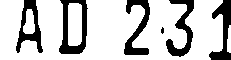

In [ ]:
#image 2
height =  int(0.7*segmentedImages[1].shape[0])
new2 = segmentedImages[1]
new2 = new2[:height, :]
kernel = np.ones((3, 3), np.uint8)
new2 = cv2.dilate(new2, kernel, iterations=1)
cv2_imshow(new2)

In [ ]:
print(pytesseract.image_to_string(new2, config='--psm 7'))

AU 237



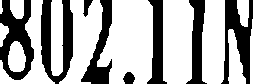

In [ ]:
#image 3
height =  int(0.8*segmentedImages[2].shape[0])
new3 = segmentedImages[2]
new3 = new3[:height, 25:]
new3 = cv2.dilate(new3, kernel, iterations=1)
cv2_imshow(new3)

In [ ]:
print(pytesseract.image_to_string(new3, config='--psm 7'))

SUZ TIN



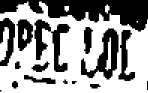

In [ ]:
#image 5
height =  int(0.9*segmentedImages[3].shape[0])
new5 = segmentedImages[3]
new5 = new5[10:height, :]
new5 = cv2.resize(new5, None, fx=1.5, fy=1.5, interpolation = cv2.INTER_AREA)
cv2_imshow(new5)

In [ ]:
print(pytesseract.image_to_string(new5, config='--psm 7'))

PEE Lar



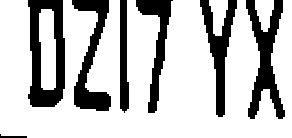

In [ ]:
#image 7
new7 = segmentedImages[4]
length =  int(0.1*segmentedImages[4].shape[1])
new7 = new7[:, length:]
new7 = cv2.resize(new7, None, fx=2, fy=2, interpolation = cv2.INTER_AREA)
kernel = np.ones((4, 4), np.uint8)
new7 = cv2.dilate(new7, kernel, iterations=1)
cv2_imshow(new7)

In [ ]:
print(pytesseract.image_to_string(new7, config='--psm 7'))

DAI YX



In [ ]:
#image 6
new6 = segmentedImages[6]
new6 = np.invert(np.array(new6))

In [ ]:
print(pytesseract.image_to_string(new6, config='--psm 7'))

PEN 15



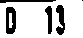

In [ ]:
#image 4
height =  int(0.75*segmentedImages[7].shape[0])
length = int(0.75*segmentedImages[7].shape[1])
new4 = segmentedImages[7]
new4 = new4[:height, :length]
cv2_imshow(new4)

In [ ]:
print(pytesseract.image_to_string(new4, config='--psm 7'))

013

